In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
from scipy.misc import derivative
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import seaborn as sns

sns.set(rc={'text.usetex' : True})
sns.set_context("paper", font_scale=2)
sns.set_style("ticks", {'axes.grid': False,
                        'axes.linewidth': 1.5,
                        'legend.frameon':True,
                        'useTex':True})

# Dark Matter Freeze Out
## $g_{*S}$ extracted from plot

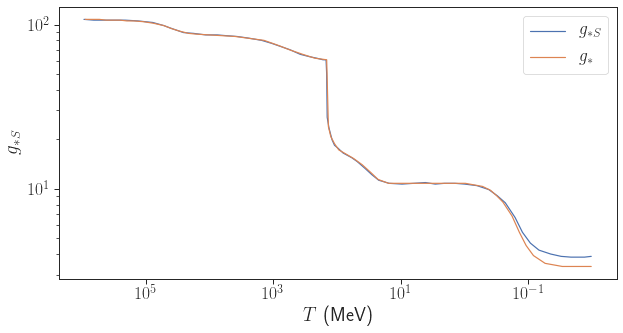

In [37]:
gstar_data = np.genfromtxt('gstar.csv', delimiter=',')

gstar_S=interp1d(gstar_data[:,0], gstar_data[:,1],kind='nearest',fill_value='extrapolate')
gstar=interp1d(gstar_data[:,2], gstar_data[:,3],kind='nearest',fill_value='extrapolate')
Ts_S=gstar_data[:,0]
Ts_S=gstar_data[:,0]
Ts=gstar_data[:,2]

plt.figure(figsize=(10,5))
plt.plot(Ts_S,gstar_S(Ts_S), label=r'$g_{*S}$')
plt.plot(Ts,gstar(Ts), label=r'$g_{*}$')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$g_{*S}$')
plt.xlabel(r'$T$ (MeV)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Converting between $a$ and $T$:

$$a^3g_{*S}(T)T^3=\text{const}$$

In [38]:
def T_to_a(T):
    return (gstar_S(T_0)/gstar_S(T))**(1/3)*(T_0/T)
def a_to_T(a):
    func = lambda T: a**3*(gstar_S(T))*T**3-gstar_S(T_0)*T_0**3
    T_initial_guess = gstar_S(T_0)**(1/3)*(T_0/a)
    T_solution = fsolve(func, T_initial_guess)
    return T_solution

# for testing:
T_0 = 0.235e-3
a_test = T_to_a(100)
a_to_T(a_test)

array([100.])

# Theoretical background

We need to create plots of $\Omega_{\text{DM}}(m_{\text{DM}})$ and  $\Omega_{\text{DM}}(\sigma_{\text{DM-DM}})$

$$\Omega_{\text{DM}}=\frac{\rho_{\text{DM}}}{\rho_{\text{crit}}}$$

Here, $\rho_{\text{DM}}$ is the present value, which can be obtained as follows: 

We calculate $n_{\text{DM}}$ at decoupling, redshift it and then do $\rho_{\text{DM}}= n_{\text{DM},0}m_{\text{DM}}$, where $n_{\text{DM},0}$ can be obtained from the value at decoupling using $n_{\text{DM},0}=n_{\text{DM}}a^{-3}$

For cold dark matter (non-relativistic case):

$$n_{\text{DM}}=g\left(\frac{m_{\text{DM}}T}{2\pi}\right)^{3/2}e^{-m_{\text{DM}}/T}$$

For hot dark matter (relativistic case):

$$n_{\text{DM}}=\frac{\zeta(3)}{\pi^2}gT^3 \text{ for bosons, or }n_{\text{DM}}=\frac34\frac{\zeta(3)}{\pi^2}gT^3 \text{ for fermions.}$$

Let us first assume that the cross section for DM-DM interactions is
$$ \sigma_{\text{DM-DM}}=G_F^2T^2$$

The Hubble parameter, in the radiation dominated universe, is given by:
$$ H(T)=\frac{\pi}{3}\left(\frac{g_*}{10}\right)^{1/2}\frac{T^2}{M_{\text{Pl}}} $$

Using the equipartition theorem, we can compute the velocity of a gas of particles at a temperature $T$:
$$v=\sqrt{\frac{3k_BT}{m_{DM}}}$$

### Instantaneous decoupling

Assuming decoupling was instantaneous, we need to find the freeze-out temperature by equating the interaction rate and the Hubble rate:
$$H(T_{fo})=\Gamma(T_{fo})\Leftrightarrow H(T_{fo})=n(T_{fo})\sigma(T_{fo})v(T_{fo})$$

# Values and units

We will work in natural units. Here are the values that we need:

$G_F=1.1663787 \times 10^{-5} \text{ GeV}^{-2}$

$M_{\text{Pl}}=2.435\times 10^{18}\text{ GeV}$

$k_B=1$

$T_0=0.235 \text{ meV}$

$\rho_{\text{crit}}=\frac{3H_0^2}{8\pi G}=1.0997\times10^{-8}\text{ eV}^4$

The ranges of $m_{\text{DM}}$ and of $\sigma_{\text{DM-DM}}$ that we need to plot over are:

$m_{\text{DM}}\in [0.1\text{ eV}, 10\text{ keV}] \text{ for hot dark matter}$

$m_{\text{DM}}\in [10\text{ MeV}, 10\text{ TeV}] \text{ for cold dark matter}$

$\sigma_{\text{DM-DM}}\in [G_F\times 10^{-6},G_F\times 10^6]$

# Gradual Freeze Out

Evolution of the number of dark matter particles:

\begin{equation}
\frac{dn}{dt}+3Hn=\frac{d(na^3)}{a^3dt}=\langle\sigma v\rangle(n_{eq}^2-n^2)
\end{equation}

Replacing $n$ with $Y=n/s$, we can rewrite this equation as:

$$ \frac{dY}{dx}=\frac{s\langle\sigma v\rangle}{Hx}\left(1+\frac13\frac{d(\log g_s)}{d(\log T)}\right)(Y_{eq}^2-Y^2) $$

Here, $x=m/T$.

After calculating $Y$ at present we can plot the present day abundances using:

$$\Omega=\rho_{\text{DM}}/\rho_{\text{crit}}=m s_0 Y_0/\rho_{\text{crit}}$$

We can calculate $Y$ in multiple ways. The simplest (numerical) way is to solve:

$$ \frac{dW}{dx}=\frac{\lambda}{x^2}\left(1+\frac13\frac{d(\log g_s)}{d(\log T)}\right)\frac{g_s}{g_\rho^{1/2}}(e^{2W_{eq}-W}-e^W) $$

Here, $W=\log(Y)$, $Y_{eq}=0.145(g/g_s)x^{3/2}e^{-x}$ and $\lambda=2.76\times 10^{35}m\langle\sigma v\rangle$.

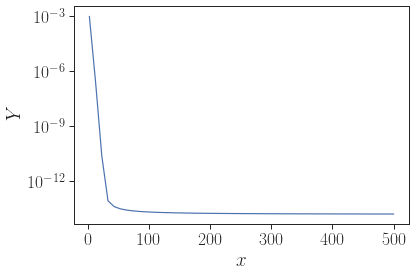

[3.18280016e-10]


In [42]:
m = 1e7 # 10 GeV
sigmav = 6.5e-29 # 1/eV^2
g = 2
lamb = 2.76e35*m*(sigmav)
crit_dens = 1.0997e-8
T_0 = 0.235e-3

def Weq(x):
    Yeq = 0.145*(g/gstar_S(m/x))*x**(3/2)*np.exp(-x)
    return np.log(Yeq)

def dloggdlogT(T):
    func = lambda T: np.log(gstar_S(T))
    return derivative(func,np.log(T))

# function that returns dy/dt
def equation(W,x):
    T = m/x
    frac = gstar_S(T)/(gstar(T)**(1/2))
    dWdx = (lamb/x**2)*(1+(1/3)*dloggdlogT(T))*frac*(np.exp(2*Weq(x)-W)-np.exp(W))
    return dWdx

# initial condition
W0 = Weq(1)

# time points
xs = np.linspace(3,500)

# solve ODE
W = odeint(equation,W0,xs)

Y = np.exp(W)

plt.plot(xs, Y)
plt.yscale('log')
plt.xscale('linear')
plt.ylabel(r'$Y$')
plt.xlabel(r'$x$')
plt.show()

Y0 = Y[-1]

def entr_dens(T):
    return (2*np.pi**2/45)*(gstar_S(T))*T**3

omega = m*entr_dens(T_0)*Y0/crit_dens

print(omega)

# Notes

In definition of $H(T)$, we need to use correct definition of $g$